In [18]:
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
from PIL import Image
import os
import io
from random import sample


In [2]:

# Specify the path to your Parquet file
file_path = 'D:\Codes\Python\DL_Project\P1.parquet'

# Read the Parquet file into a PyArrow Table
table = pq.read_table(file_path)

# Convert the PyArrow Table to a Pandas DataFrame if needed
df = table.to_pandas()

# Now you can work with the DataFrame
print(df.columns)



Index(['indices', 'plans', 'walls', 'colors', 'footprints', 'plan_captions'], dtype='object')


In [4]:
print(df.head())

    indices                                              plans  \
0  00000000  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
1  00000001  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
2  00000010  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
3  00000100  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
4  00001000  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   

                                               walls  \
0  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
1  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
2  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
3  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
4  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   

                                              colors  \
0  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
1  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
2  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
3  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x

In [ ]:
additional_parquet_files = [
    "D:\Codes\Python\DL_Project\P2.parquet",
    "D:\Codes\Python\DL_Project\P3.parquet",
    "D:\Codes\Python\DL_Project\P4.parquet",
    "D:\Codes\Python\DL_Project\P5.parquet",
    "D:\Codes\Python\DL_Project\P6.parquet",
    "D:\Codes\Python\DL_Project\P7.parquet",
    "D:\Codes\Python\DL_Project\P8.parquet"
]
dfs = []

for file_path in additional_parquet_files:
    new_df = pd.read_parquet(file_path)
    dfs.append(new_df)

combined_df = pd.concat([df] + dfs, ignore_index=True)

In [29]:
# Create the main database directory
database_dir = 'D:\Codes\Python\DL_Project\database'
os.makedirs(database_dir, exist_ok=True)

# List of subfolders for different types of data
subfolders = ['plans', 'walls', 'colors', 'footprints', 'plan_captions']

# Create subdirectories for each type of data
for subfolder in subfolders:
    subfolder_path = os.path.join(database_dir, subfolder)
    os.makedirs(subfolder_path, exist_ok=True)

# Iterate through each row of the DataFrame
for index, row in combined_df.iterrows():
    # Get the index value from the 'indices' column
    idx = row['indices']

    # Iterate through each subfolder type
    for subfolder in subfolders[:-1]:  # Exclude 'description' subfolder
        # Check if the column contains image data as a dictionary
        if isinstance(row[subfolder], dict):
            # Extract the image data from the dictionary
            image_data = row[subfolder]['bytes']
            
            # Save the image to the corresponding subfolder using the index value
            image = Image.open(io.BytesIO(image_data))
            image_path = os.path.join(database_dir, subfolder, f"{idx}.png")  # Adjust file extension as needed
            image.save(image_path)
            
    # Save the description to the 'description' subfolder using the index value
    description_path = os.path.join(database_dir, 'plan_captions', f"{idx}.txt")
    with open(description_path, 'w') as file:
        file.write(row['plan_captions'])

# Show the first few rows of the DataFrame to verify
print(combined_df.head())


    indices                                              plans  \
0  00000000  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
1  00000001  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
2  00000010  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
3  00000100  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
4  00001000  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   

                                               walls  \
0  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
1  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
2  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
3  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
4  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   

                                              colors  \
0  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
1  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
2  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
3  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x

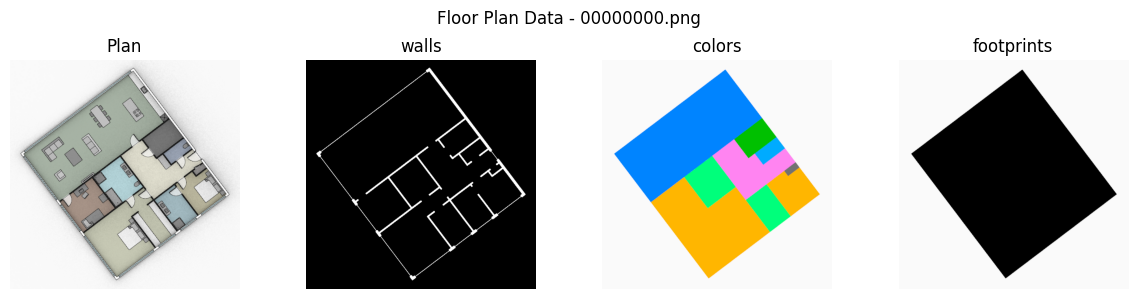

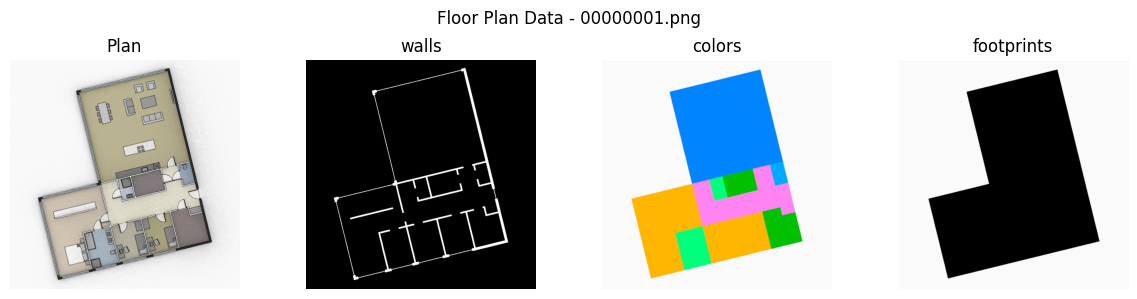

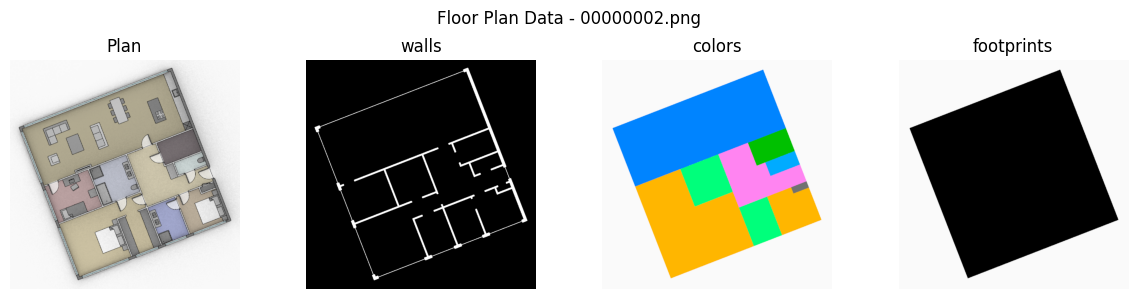

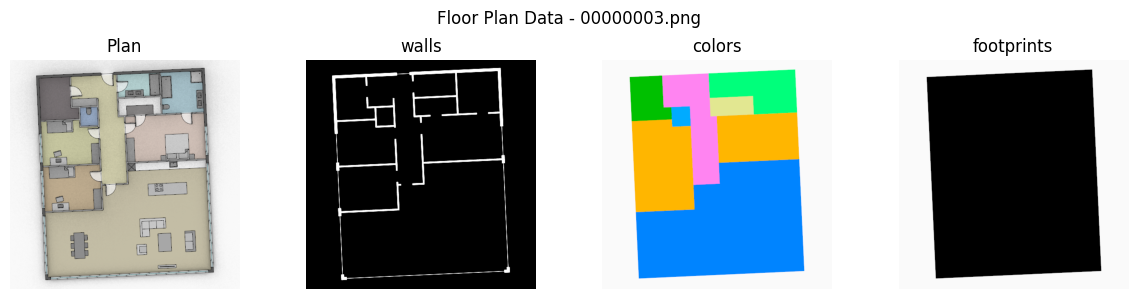

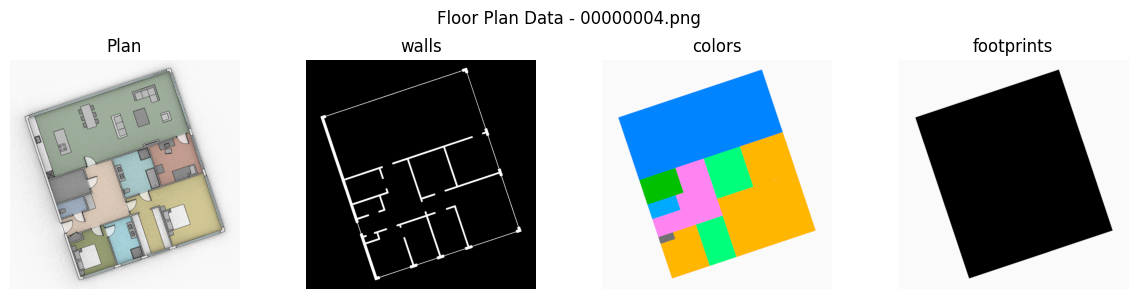

In [12]:
import matplotlib.pyplot as plt
import os

# Define directory paths (replace with your actual paths)
data_dir = 'D:\Codes\Python\DL_Project\database'
plan_dir = os.path.join(data_dir, "plans")
wall_dir = os.path.join(data_dir, "walls")
color_dir = os.path.join(data_dir, "colors")
footprint_dir = os.path.join(data_dir, "footprints")
caption_dir = os.path.join(data_dir, "plan_captions")

# Define number of images to visualize per directory
num_images_to_show = 5

# Loop through each image file in the plan directory
for filename in os.listdir(plan_dir)[:num_images_to_show]:
  # Create a figure for plotting
  fig, axes = plt.subplots(1, 4, figsize=(12, 3))  # 1 row, 4 columns

  # Read image from plan directory
  plan_img = plt.imread(os.path.join(plan_dir, filename))
  axes[0].imshow(plan_img)
  axes[0].set_title("Plan")
  axes[0].axis('off')

  # Read corresponding images from other directories with the same filename
  for i, img_dir in enumerate([wall_dir, color_dir, footprint_dir], start=1):
    img_path = os.path.join(img_dir, filename)
    if os.path.exists(img_path):
      img = plt.imread(img_path)
      axes[i].imshow(img)
      title = img_dir.split("\\")[-1]  # Get directory name for title
      axes[i].set_title(title)
      axes[i].axis('off')

  # Adjust layout
  fig.suptitle(f"Floor Plan Data - {filename}", fontsize=12)
  plt.tight_layout()

  # Display the plot
  plt.show()